### 🧪 Simulação de Cinética Química

Durante a disciplina de Cinética Química, espera-se que seja possível realizar a simulação de reações químicas que sejam coerentes com os conceitos da cinética química. Entretanto, para que isso seja feito, a simulação é construída aos poucos, partindo de um sistema simples de partículas que possuem características diferentes e colidem entre si. 

Primeiramente, com o auxílio de inteligência artificial iniciou-se a construção do código a partir da escrita de uma classe que define as características das partículas e a forma como elas iriam se mover. Para definir o tamanho das partículas foi utilizada a informação de raio atômico dos átomos presente na biblioteca python “periodictable” que contém informações sobre todos os átomos da tabela periódica. Ademais, para saber a respeita da quantia de átomos iguais e para resgatar as informações de cada um da biblioteca é utilizado o “input” para que o usuário defina esses itens.

In [1]:
import tkinter as tk
import random
import math
import periodictable

class Ball:
    def __init__(self, size, color, velocity):
        self.size = size
        self.color = color
        self.velocity = velocity
        self.x = random.randint(size, 400-size)
        self.y = random.randint(size, 400-size)

 

    def draw(self, canvas):
        canvas.create_oval(self.x-self.size, self.y-self.size, self.x+self.size, self.y+self.size, fill=self.color)

 

    def move(self, balls):
        self.x += self.velocity[0]
        self.y += self.velocity[1]
        if self.x - self.size < 0 or self.x + self.size > 400:
            self.velocity[0] = -self.velocity[0]
        if self.y - self.size < 0 or self.y + self.size > 400:
            self.velocity[1] = -self.velocity[1]
        for ball in balls:
            if ball != self:
                distance = math.sqrt((self.x - ball.x)**2 + (self.y - ball.y)**2) #Para definir a colisão entre os átomos é feita uma análise quanto a distância 
                                                                                  #entre as “bolinhas”, se a distância quadrática entre elas for menor 
                                                                                  #que o tamanho do raio delas, a velocidade das duas juntas passa a ser 
                                                                                  #a média da velocidade das duas.
                if distance < self.size + ball.size:
                        # calculate the average velocity of the colliding balls
                        avg_velocity = [(self.velocity[0] + ball.velocity[0]) / 2,
                                        (self.velocity[1] + ball.velocity[1]) / 2]
                        # set the final velocity of both balls to the average velocity
                        self.velocity = avg_velocity
                        ball.velocity = avg_velocity


    def check_collisions(balls):
        for i in range(len(balls)):
            for j in range(i+1, len(balls)):
                distance = math.sqrt((balls[i].x - balls[j].x)**2 + (balls[i].y - balls[j].y)**2)
                if distance < balls[i].size + balls[j].size:
                    balls[i].velocity[0] = -balls[i].velocity[0]
                    balls[i].velocity[1] = -balls[i].velocity[1]
                    balls[j].velocity[0] = -balls[j].velocity[0]
                    balls[j].velocity[1] = -balls[j].velocity[1]
                    
    
                



# create a window and canvas
window = tk.Tk()
canvas = tk.Canvas(window, width=400, height=400) # Cria os limites da tela
canvas.pack()

resposta = "s" # Quando 'resposta' é igual a "s", a pergunta sobre qual elemento deve ser inserida é feita e,
               # por isso, possui esse valor inicial
    
balls = [] # Lista que armazena todas as bolas (átomos)

CORES = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink'] # Lista com as cores que as bolas podem
                                                                       # assumir

while(resposta == "s"): # Enquanto resposta for sim, o sistema irá continuar pedindo para você informar elementos
                        # a serem inseridos
        
    simbolo_elemento = input("Qual elemento deseja inserir no sistema? Insira apenas o símbolo.")
    quantidade = int(input("Quantos desse elemento deseja inserir no sistema?"))
    
    element = getattr(periodictable, simbolo_elemento.capitalize()) # Busca o elemento no banco de dados da biblioteca
    raio = int(element.covalent_radius*10) # O raio atômico é multiplicado por 10 para obter tamanho proporcional à
                                           # tela e depois é convertido em inteiro
        
    cor = random.choice(CORES) # Escolhe aleatoriamente uma cor presente na lista 'CORES' 
    CORES.remove(cor) # Faz com que a mesma cor não seja sorteada para bolas diferentes
    
    for _ in range(quantidade): # O loop cria várias bolas do mesmo tipo, mas com velocidades diferentes
        velocidade = [random.randint(-100, 100), random.randint(-100, 100)] # A velocidade é uma lista em que a posição
                                                                            # 0 e 1 representam os eixos X e Y, respec-
                                                                            # tivamente. Cada valor é escolhido aleato-
                                                                            # riamente.
                    
        balls.append(Ball(raio, cor, velocidade)) # Adiciona a nova bola criada à lista
    
    resposta = input("Deseja inserir átomos de outro elemento? Responda com s ou n.").lower() # Caso a resposta seja 
                                                                            # diferente de sim, a simulação é iniciada

# draw the balls on the canvas
for ball in balls:
    ball.draw(canvas)

# move the balls every 50 milliseconds
def move_balls():
    for ball in balls:
        ball.move(balls)
        canvas.delete('all')
        for ball in balls:
            ball.draw(canvas)
    check_collisions(balls)
    canvas.after(50, move_balls)

move_balls()

# start the tkinter event loop
window.mainloop()


Qual elemento deseja inserir no sistema? Insira apenas o símbolo. n
Quantos desse elemento deseja inserir no sistema? 10
Deseja inserir átomos de outro elemento? Responda com s ou n. n


## Simulação de colisões elásticas

pygame 2.5.0 (SDL 2.28.0, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


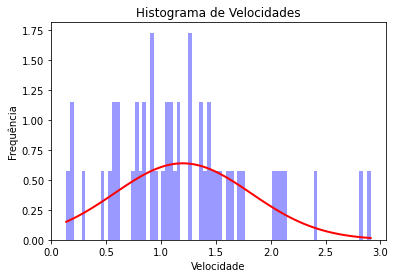

In [1]:
import pygame
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Inicialização do pygame
pygame.init()

# Parâmetros
num_atoms = 50
temperatura = 8 # em Kelvin
raio = 10
massa = 20

# Parâmetros da janela
width, height = 800, 600
window = pygame.display.set_mode((width, height))
pygame.display.set_caption("Simulação da Colisão Elástica")

# Cores
white = (255, 255, 255)
red = (255, 0, 0)

# Classe para representar átomos
class Atom:
    def __init__(self, x, y, radius, temperatura, massa):
        self.x = x
        self.y = y
        self.massa = massa
        self.temperatura = temperatura
        self.radius = radius
        self.speed = np.sqrt(2 * self.temperatura / self.massa) *  np.sqrt(-2 * np.log(random.random()))
        self.speed_x = self.speed
        self.speed_y = self.speed
        self.direction = random.uniform(0, 2*math.pi)

    def move(self):
        self.x += self.speed_x * math.cos(self.direction)
        self.y += self.speed_y * math.sin(self.direction)

        # Restringir a bola dentro da região
        self.x = max(self.radius, min(self.x, width - self.radius))
        self.y = max(self.radius, min(self.y, height - self.radius))

    def check_collision(self, other):
        distance = math.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)
        return distance <= self.radius + other.radius

    def handle_collision(self, other):
        ##### Parâmetros para tentativa de calcular impulso.
        dx = other.x - self.x
        dy = other.y - self.y
        distance = math.sqrt(dx ** 2 + dy ** 2)
        if distance == 0:
            distance = self.radius + other.radius
        normal_x = dx / distance
        normal_y = dy / distance
        velocidade_relativa_x = other.speed_x - self.speed_x
        velocidade_relativa_y = other.speed_y - self.speed_y
        
        
        angle = math.atan2(other.y - self.y, other.x - self.x)
        self_direction = self.direction
        other_direction = other.direction
        
        m1,m2 = self.radius**2,other.radius**2
        M = m1 + m2
        r1,r2 = self.x, other.p
        d = np.linalg.norm(r1-r2)**2
        v1, v2 = self.v, b2.v
        u1 = v1 - 2*m2/M *(np.dot(v1-v2,r1-r2)/d)* (r1-r2)
        u2 = v2 - 2*m1/M * np.dot(v2-v1,r2-r1)/d * (r2-r1)
        self.v = u1
        b2.v = u2
        
        self.direction = angle + (angle - self_direction)  # Atualizar direção
        other.direction = angle + (angle - other_direction)  # Atualizar direção

    def handle_wall_collision(self):
        # Refletir a direção da bola quando colide com as paredes
        if self.x - self.radius <= 0 or self.x + self.radius >= width:
            self.direction = math.pi - self.direction
        if self.y - self.radius <= 0 or self.y + self.radius >= height:
            self.direction = -self.direction

# Lista de átomos

atoms = []

for _ in range(num_atoms):
    valid_position = False
    while not valid_position:
        x = random.randint(50, width - 50)
        y = random.randint(50, height - 50)
        
        # Verificar se a posição não está muito próxima de outras posições já escolhidas
        if all(math.sqrt((x - atom.x)**2 + (y - atom.y)**2) >= 3 * atom.radius for atom in atoms):
            valid_position = True

    atom = Atom(x, y, raio, temperatura, massa)
    atoms.append(atom)
    
# Loop principal
running = True
clock = pygame.time.Clock()

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    window.fill(white)

    for atom in atoms:
        atom.move()
        atom.handle_wall_collision()
        pygame.draw.circle(window, red, (int(atom.x), int(atom.y)), atom.radius)

    # Verificar colisões
    for i in range(len(atoms)):
        for j in range(i + 1, len(atoms)):
            if atoms[i].check_collision(atoms[j]):
                atoms[i].handle_collision(atoms[j])

    pygame.display.flip()
    clock.tick(200)
    
# Coletar as velocidades das partículas ao longo do tempo
velocities = []
for atom in atoms:
    velocities.append(atom.speed)

# Criar um histograma das velocidades
plt.figure()
plt.hist(velocities, bins=80, density=True, alpha=0.4, color='blue')

# Ajustar os dados a uma distribuição gaussiana usando a função norm.fit()
mu, sigma = norm.fit(velocities)

# Calcular a distribuição gaussiana ajustada
x = np.linspace(min(velocities), max(velocities), 100)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color='red', linewidth=2)

plt.xlabel('Velocidade')
plt.ylabel('Frequência')
plt.title('Histograma de Velocidades')
plt.show()




pygame.quit()
